# NEW Version


# Packages Unloading


In [12]:
import pandas as pd

In [13]:
time_comparison = pd.DataFrame([(22, 6726, 1, 1, 0)], columns={'hour','Activity_Num','time_required','hourly_available_seconds','time_still_need'})

ValueError: columns cannot be a set

In [3]:
import numpy as np

In [6]:
import pandas as pd
import math
names = locals()
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import statistics
from PackagingToll import *
import pyodbc as odbc

C:\Users\msmetanin\OneDrive - Conestoga Meat Packers Ltd\Documents\Courses\Python\pythonProject2\PackagingToll.py:1289: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seq = pd.read_sql(query, cnxn)
C:\Users\msmetanin\OneDrive - Conestoga Meat Packers Ltd\Documents\Courses\Python\pythonProject2\PackagingToll.py:1324: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ProdMeat = pd.read_sql(query, cnxn,


C:\Users\msmetanin\OneDrive - Conestoga Meat Packers Ltd\Documents\Courses\Python\pythonProject2\PackagingToll.py:1363: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  meat = pd.read_sql(query, cnxn,


    itemkey                                itemdesc  PiecesInBox  \
0     34019  Fresh Pork Ham Boneless Inside Denuded          450   
1     34119     Fresh Pork Hams Bnls Inside Denuded          450   
2     30016                     Fresh Pork Side Rib          415   
3     30008     Fresh Pork Shoulder Picnic Boneless          270   
4     31508     Fresh Pork Shoulder Picnic Boneless          270   
..      ...                                     ...          ...   
68    19101                        Frozen Pork Loin            3   
69    19009                          Fresh Pork Ham            2   
70    20014                Fresh Pork Belly Rind On            2   
71    22201                         Fresh Pork Loin            2   
72    26001                         Fresh Pork Loin            2   

    Priority1Qty  Priority2Qty  Priority3Qty  Priority4Qty  
0              0             0             4             2  
1              0             6             0             0  


ValueError: columns cannot be a set

# Reading the Files


#### Assumptions:

- Excluding byproducts

- Excluded offa

- Excluded the following activities:

  -- 6718, Box Room

  -- 3-digit activity codes

- Assuming the duration is for boxes not by pieces

- Products need to be completed by priority


In [10]:
# Sequence table
# seq=pd.read_excel("Files/Activities.xlsx", sheet_name='Product Seqeunce')
server = 'cmpcsb01'
database = 'conestoga'
username = 'remotequery'
password = "excel"
cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, 
                    trusted_connection='no'
                    )
cursor = cnxn.cursor()

query = '''select 
        convert(INT, bomkey) as bomkey,
        CONVERT(INT, sequenceno) as SeQuenceno,
         CONVERT(INT, ActivityFunctionKey) as ActivityFunctionKey,
         CONVERT(INT, DurationMinutes) as DurationSeconds
         
FROM [conestoga].[dbo].[DimBOMActivitiesFunctions]
 where BomKey>10001
 '''
 
seq = pd.read_sql(query, cnxn)
seq

# Maximum Capacity
# cap=pd.read_excel("ActiviActivity Cap Modties.xlsx", sheet_name='Activity Cap')
# cap=pd.read_excel("Files/Activities_adjust.xlsx", sheet_name='Activity Cap')
cap=pd.read_excel("Q:\Operations\Industrial Engineering\Maxim\Packaging tool\Activities_adjust.xlsx", sheet_name='Activity Cap Mod')

# Products and Meat Relationship Table
# ProdMeat=pd.read_excel("Files/Activities.xlsx", 
#                     #    sheet_name='Products and Meat'
#                     sheet_name='dataProdMeat'
#                        )
# print(ProdMeat.shape)

server = 'cmpcsb01'
database = 'conestoga'
username = 'remotequery'
password = "excel"
cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, 
                    # trusted_connection='yes'
                    )
cursor = cnxn.cursor()
# print(cursor)
query = '''SELECT 
           CAST(Itemkey as int) as FinishedGoodProductCode, 
           --Pieces, 
           Cast(ItemSort4Key as INT) as MeatItem
            FROM dimitem
            WHERE Itemkey >  ? and Itemkey < ?
            --and ItemSort4Key > 0
            '''
ProdMeat = pd.read_sql(query, cnxn, 
                   params=['10000', '39999']
                )

# ProdMeat.head()
# print("ss", ProdMeat.shape)


# Four Priority Requirement
# req = pd.read_excel("Files/req wihtout byproducts.xlsx")
req = pd.read_excel("Files/req wihtout byproducts.xlsx", sheet_name='data (2)')
# req = pd.read_excel("Files/Cut Sheet 20221024", sheet_name='Sheet2' )

# Priority Meat Input
# meat=pd.read_excel("Files/Meats.xlsx",  sheet_name ='Priority Meat Input') #delected the byproduct,
# meat=pd.read_excel("Files/Meats_adjust_v3.xlsx",  sheet_name ='Priority Meat Input') #delected the byproduct,
# meat=pd.read_excel("Files/Meats_adjust_v3.xlsx",  sheet_name ='meat prior') #delected the byproduct,

import pyodbc as odbc
import pandas as pd
server = 'cmpcsb01'
database = 'packagingplanner'
username = 'remotequery'
password = "excel"
cnxn = odbc.connect('DRIVER={SQL Server}; SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password, 
                    trusted_connection='no'
                    )
cursor = cnxn.cursor()
print(cursor)

query = '''SELECT 

cast(MeatItem as INT) as Meat, 
SUM(P1) AS 'Priority 1', 
SUM(P2) AS 'Priority 2', 
SUM(P3) AS 'Priority 3', 
SUM(P4) AS 'Priority 4'
FROM     vwPrepForCutInputPriorities
where productiondate= ? and MeatItem < ?
GROUP BY MeatItem'''
meat = pd.read_sql(query, cnxn, 
                   params=['20221021', 800]
                )


# Cool


# Hourly Meat Input
# meat_hourly = pd.read_excel("Files/hourly_meat_input.xlsx",index_col = 0)

meat_hourly = pd.read_excel(
# "Files/hourly_meat_input_adjustment_v3.xlsx",index_col = 0, sheet_name='Sheet1'
"Q:\Operations\Industrial Engineering\Maxim\Packaging tool\Files/PackagingSimulationInputs v4.xlsx", index_col = 0, sheet_name='Summ'
 )


# relationship between hour and priority
## key represents hour, value represents priority
hour_priority={
    6:1,
    7:1,
    8:1,
    9:1,
    10:1,
    11:1,
    12:1,
    13:1,
    14:1,
    15:2,
    16:2,
    17:3,
    18:3,
    19:4,
    20:4,
    21:4,
    22:4
    }

NameError: name 'odbc' is not defined

In [8]:
seq

NameError: name 'seq' is not defined

In [6]:
hour_priority.keys()

dict_keys([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [7]:
seq.head(2)

,bomkey,SeQuenceno,ActivityFunctionKey,DurationSeconds
0,10001,1,712,38
1,10001,2,712,76


In [8]:
cap.head(2
         )

,Activity_Num,Activity_Desc,Max_Dom,Chilled pork,Max
0,6701,Pkg - Box Backribs CC,6,0,6
1,6703,Pkg - C105 Ham - Open Bags,0,0,1


In [9]:
ProdMeat.head(2)

,FinishedGoodProductCode,MeatItem
0,10001,324
1,10002,307


In [10]:
new_var = req.head(2)
new_var

,itemkey,itemdesc,PiecesInBox,Priority1Qty,Priority2Qty,Priority3Qty,Priority4Qty
0,34019,Fresh Pork Ham Boneless Inside Denuded,450,0,0,4,2
1,34119,Fresh Pork Hams Bnls Inside Denuded,450,0,6,0,0


In [11]:
meat.head(2)

,Meat,Priority 1,Priority 2,Priority 3,Priority 4
0,101,0,0,6,0
1,103,0,9610,0,1860


In [12]:
meat_hourly.fillna(0, inplace = True)
meat_hourly.head(2)

,701,705,706,767,702,710,712,714,719,760,...,341,313,320,352,348,309,401,405,403,402
t,,,,,,,,,,,,,,,,,,,,,
6,0,400,0,0,300,0,0,400,0,28,...,0,0,0,0,770,0,770,770,770,0
7,0,400,0,0,300,0,0,400,0,0,...,0,0,0,0,770,0,770,770,770,0


In [11]:
req.columns

Index(['itemkey', 'itemdesc', 'PiecesInBox', 'Priority1Qty', 'Priority2Qty',
       'Priority3Qty', 'Priority4Qty'],
      dtype='object')

In [13]:
req = req.loc[req["PiecesInBox"]!=0,:]
req.head(3)

,itemkey,itemdesc,PiecesInBox,Priority1Qty,Priority2Qty,Priority3Qty,Priority4Qty
0,34019,Fresh Pork Ham Boneless Inside Denuded,450,0,0,4,2
1,34119,Fresh Pork Hams Bnls Inside Denuded,450,0,6,0,0
2,30016,Fresh Pork Side Rib,415,0,15,1,19


In [14]:
meat.Meat.values

array([101, 103, 104, 111, 141, 144, 147, 148, 149, 303, 309, 313, 324,
       341, 348, 401, 402, 403, 405, 501, 502, 506, 510, 511, 518, 545,
       553, 583, 701, 702, 703, 705, 706, 710, 712, 714, 715, 716, 719,
       739, 760, 762, 775, 786, 787], dtype=int64)

In [14]:
meat_hourly.shape

(17, 53)

In [15]:
import numpy as np
# meat_hourly.count(axis= 1)
meat_hourly.columns = np.dtype('int64').type(meat_hourly.columns)
meat_hourly.head(2)

,701,705,706,767,702,710,712,714,719,760,...,341,313,320,352,348,309,401,405,403,402
t,,,,,,,,,,,,,,,,,,,,,
6,0,400,0,0,300,0,0,400,0,28,...,0,0,0,0,770,0,770,770,770,0
7,0,400,0,0,300,0,0,400,0,0,...,0,0,0,0,770,0,770,770,770,0


In [16]:
# meat_hourly = meat_hourly.loc[:,list(meat.Meat.values)]
# meat_hourly.head(2)

In [16]:
meat_hourly

,701,705,706,767,702,710,712,714,719,760,...,341,313,320,352,348,309,401,405,403,402
t,,,,,,,,,,,,,,,,,,,,,
6,0,400,0,0,300,0,0,400,0,28,...,0,0,0,0,770,0,770,770,770,0
7,0,400,0,0,300,0,0,400,0,0,...,0,0,0,0,770,0,770,770,770,0
8,0,400,0,0,300,0,0,400,0,0,...,0,370,0,0,400,0,770,770,260,510
9,0,400,0,0,300,0,0,400,0,0,...,0,770,0,0,0,0,770,770,0,770
10,4,400,0,0,260,0,140,400,0,0,...,0,770,0,0,0,0,770,770,0,770
11,4,400,0,0,0,0,400,400,0,0,...,0,732,0,0,0,38,770,770,0,770
12,4,400,0,0,0,0,800,0,0,0,...,0,0,0,0,0,770,770,770,0,770
13,0,281,300,0,0,0,800,0,0,0,...,0,0,0,0,0,770,770,770,0,770
14,0,0,150,0,0,0,200,0,0,0,...,0,0,0,0,0,770,770,770,0,770


In [18]:
meat.Meat.values

array([101, 103, 104, 111, 141, 144, 147, 148, 149, 303, 309, 313, 324,
       341, 348, 401, 402, 403, 405, 501, 502, 506, 510, 511, 518, 545,
       553, 583, 701, 702, 703, 705, 706, 710, 712, 714, 715, 716, 719,
       739, 760, 762, 775, 786, 787], dtype=int64)

# Data Cleaning


In [23]:
#Some products have 0 PiecesInBox, these skus are also excluded
req = req.loc[req["PiecesInBox"]!=0,:]

# exclude byproduct(just include meat_id in Meat table)
meat_hourly = meat_hourly.loc[:,list(meat.Meat.values)]

#combine meat inputs and requirements
meat_and_req = req.merge(ProdMeat, left_on='itemkey',  right_on='FinishedGoodProductCode', how='left')

In [63]:
# sales.drop(sales.CustomerID.isin(badcu))
chilled_pork = [148, 152, 348, 352, 353, 460, 461, 702, 762, 784, 786, 787]
meat_and_req[~meat_and_req['MeatItem'].isin(chilled_pork)].head()

,itemkey,itemdesc,PiecesInBox,Priority1Qty,Priority2Qty,Priority3Qty,Priority4Qty,FinishedGoodProductCode,MeatItem
0,34019,Fresh Pork Ham Boneless Inside Denuded,450,0,0,4,2,34019,553
1,34119,Fresh Pork Hams Bnls Inside Denuded,450,0,6,0,0,34119,553
2,30016,Fresh Pork Side Rib,415,0,15,1,19,30016,111
3,30008,Fresh Pork Shoulder Picnic Boneless,270,0,0,0,4,30008,715
4,31508,Fresh Pork Shoulder Picnic Boneless,270,0,9,0,12,31508,715


In [64]:
meat_hourly[meat_hourly.columns[~meat_hourly.columns.isin(chilled_pork)]]

,101,103,104,111,141,144,147,149,303,309,...,706,710,712,714,715,716,719,739,760,775
t,,,,,,,,,,,,,,,,,,,,,
6,6,900,0,940,0,0,0,150,330,0,...,0,0,0,400,165,0,0,0,28,0
7,0,900,0,940,0,0,0,150,330,0,...,0,0,0,400,265,0,0,0,0,0
8,0,900,0,940,0,0,0,150,330,0,...,0,0,0,400,473,0,0,0,0,0
9,0,860,0,940,0,0,0,190,330,0,...,0,0,0,400,700,0,0,0,0,0
10,0,850,0,940,0,0,0,300,330,0,...,0,0,140,400,700,0,0,0,0,0
11,0,850,0,940,0,0,0,300,330,38,...,0,0,400,400,700,0,0,0,0,0
12,0,850,0,940,0,0,0,600,330,770,...,0,0,800,0,1100,0,0,0,0,0
13,0,850,0,940,0,0,0,600,330,770,...,300,0,800,0,1100,0,0,0,0,0
14,0,900,0,487,0,0,0,0,330,770,...,150,0,200,0,457,60,0,0,0,0


: 

In [51]:
meat_hourly

,101,103,104,111,141,144,147,148,149,303,...,714,715,716,719,739,760,762,775,786,787
t,,,,,,,,,,,,,,,,,,,,,
6,6,900,0,940,0,0,0,250,150,330,...,400,165,0,0,0,28,500,0,0,0
7,0,900,0,940,0,0,0,250,150,330,...,400,265,0,0,0,0,400,0,0,0
8,0,900,0,940,0,0,0,250,150,330,...,400,473,0,0,0,0,400,0,0,0
9,0,860,0,940,0,0,0,251,190,330,...,400,700,0,0,0,0,400,0,0,0
10,0,850,0,940,0,0,0,251,300,330,...,400,700,0,0,0,0,400,0,0,0
11,0,850,0,940,0,0,0,251,300,330,...,400,700,0,0,0,0,400,0,0,0
12,0,850,0,940,0,0,0,251,600,330,...,0,1100,0,0,0,0,0,0,0,0
13,0,850,0,940,0,0,0,246,600,330,...,0,1100,0,0,0,0,0,0,0,0
14,0,900,0,487,0,0,0,0,0,330,...,0,457,60,0,0,0,0,0,0,0


In [20]:
# Write loop to exlude for missing meat items

meat_hourly.loc[10:20, [148, 702, 762, 786, 787]]

,148,702,762,786,787
t,,,,,
10,251,260,400,0,0
11,251,0,400,0,0
12,251,0,0,0,0
13,246,0,0,0,0
14,0,0,0,0,0
15,0,0,0,0,0
16,0,0,0,0,0
17,0,0,0,0,0
18,0,0,0,0,0


In [22]:
max(meat_hourly.index)

22

In [23]:
meat_hourly = meat_hourly.loc[:,list(meat.Meat.values)]
meat_hourly

,101,103,104,111,141,144,147,148,149,303,...,714,715,716,719,739,760,762,775,786,787
t,,,,,,,,,,,,,,,,,,,,,
6,6,900,0,940,0,0,0,250,150,330,...,400,165,0,0,0,28,500,0,0,0
7,0,900,0,940,0,0,0,250,150,330,...,400,265,0,0,0,0,400,0,0,0
8,0,900,0,940,0,0,0,250,150,330,...,400,473,0,0,0,0,400,0,0,0
9,0,860,0,940,0,0,0,251,190,330,...,400,700,0,0,0,0,400,0,0,0
10,0,850,0,940,0,0,0,251,300,330,...,400,700,0,0,0,0,400,0,0,0
11,0,850,0,940,0,0,0,251,300,330,...,400,700,0,0,0,0,400,0,0,0
12,0,850,0,940,0,0,0,251,600,330,...,0,1100,0,0,0,0,0,0,0,0
13,0,850,0,940,0,0,0,246,600,330,...,0,1100,0,0,0,0,0,0,0,0
14,0,900,0,487,0,0,0,0,0,330,...,0,457,60,0,0,0,0,0,0,0


In [24]:
meat_hourly

,101,103,104,111,141,144,147,148,149,303,...,714,715,716,719,739,760,762,775,786,787
t,,,,,,,,,,,,,,,,,,,,,
6,6,900,0,940,0,0,0,250,150,330,...,400,165,0,0,0,28,500,0,0,0
7,0,900,0,940,0,0,0,250,150,330,...,400,265,0,0,0,0,400,0,0,0
8,0,900,0,940,0,0,0,250,150,330,...,400,473,0,0,0,0,400,0,0,0
9,0,860,0,940,0,0,0,251,190,330,...,400,700,0,0,0,0,400,0,0,0
10,0,850,0,940,0,0,0,251,300,330,...,400,700,0,0,0,0,400,0,0,0
11,0,850,0,940,0,0,0,251,300,330,...,400,700,0,0,0,0,400,0,0,0
12,0,850,0,940,0,0,0,251,600,330,...,0,1100,0,0,0,0,0,0,0,0
13,0,850,0,940,0,0,0,246,600,330,...,0,1100,0,0,0,0,0,0,0,0
14,0,900,0,487,0,0,0,0,0,330,...,0,457,60,0,0,0,0,0,0,0


In [25]:
list(meat.Meat.values)
meat_hourly.loc[:, 101]

t
6     6
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
Name: 101, dtype: int64

In [26]:
meat_and_req.columns

Index(['itemkey', 'itemdesc', 'PiecesInBox', 'Priority1Qty', 'Priority2Qty',
       'Priority3Qty', 'Priority4Qty', 'FinishedGoodProductCode', 'MeatItem'],
      dtype='object')

In [27]:
meat_hourly.head(2)

,101,103,104,111,141,144,147,148,149,303,...,714,715,716,719,739,760,762,775,786,787
t,,,,,,,,,,,,,,,,,,,,,
6,6,900,0,940,0,0,0,250,150,330,...,400,165,0,0,0,28,500,0,0,0
7,0,900,0,940,0,0,0,250,150,330,...,400,265,0,0,0,0,400,0,0,0


# Feasibility Check For 4 Priority Plan


### - Meat Feasibility Check


In [28]:
meat_hourly.isna().value_counts()

101    103    104    111    141    144    147    148    149    303    309    313    324    341    348    401    402    403    405    501    502    506    510    511    518    545    553    583    701    702    703    705    706    710    712    714    715    716    719    739    760    762    775    786    787  
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    17
dtype: int64

In [29]:
ProdMeat.tail(2)
# req.head(2)
# meat.head(2)

,FinishedGoodProductCode,MeatItem
1223,39200,515
1224,39211,563


In [30]:
# new_req = req.merge(ProdMeat, left_on='itemkey',  
#                     right_on='FinishedGoodProductCode', 
#                     how='left', 
#                     # validate="1:m"
#                                    )
# new_req[['FinishedGoodProductCode', 'MeatItem']] = new_req[['FinishedGoodProductCode', 'MeatItem']]
# # .fillna(0).astype('int64')
# new_req.loc[new_req['MeatItem'] <= 899]

# Function Meat Piece Check


## Onme MEat Check Function


In [31]:
meat.head(2)    

,Meat,Priority 1,Priority 2,Priority 3,Priority 4
0,101,0,0,6,0
1,103,0,9610,0,1860


### One meat checking function

In [32]:
# result = []
# meat_id_list = list(req.merge(ProdMeat, 
#                                   left_on='itemkey',  
#                                   right_on='FinishedGoodProductCode', 
#                                   how='left',
#                                validate = '1:m' # validates one to many connection
#                                ).MeatItem.drop_duplicates())
# for meat_id in meat_id_list:
#     new_req = req.merge(ProdMeat, 
#                             left_on='itemkey',  
#                             right_on='FinishedGoodProductCode', 
#                             how='left',
#                             validate= "1:m"  # validates one to many connection
#                             )

#     new_req = new_req.loc[new_req['MeatItem']==meat_id,:]
#     pieces_need_df = new_req.copy()
#     priority_cols = ['Priority1Qty', 'Priority2Qty', 'Priority3Qty', 'Priority4Qty']
#     pieces_priority_cols = []
#     for p in range(1,4+1):
#         pieces_need_df['pieces_p'+str(p)] = pieces_need_df['PiecesInBox']*pieces_need_df[priority_cols[p-1]]
#         pieces_priority_cols.append('pieces_p'+str(p))
#     pieces_need_df.drop(priority_cols, axis=1, inplace=True)
#     pieces_need_df.drop(['FinishedGoodProductCode'], axis=1, inplace=True)
#     #requirements
#     p1_req = pieces_need_df.pieces_p1.sum()
#     p2_req = pieces_need_df.pieces_p2.sum()
#     p3_req = pieces_need_df.pieces_p3.sum()
#     p4_req = pieces_need_df.pieces_p4.sum()
#     # print(p2_req)
#     avaliable=meat.loc[meat['Meat']==meat_id, :]
#     # print(avaliable)
#     p1_ava = avaliable.loc[:,'Priority 1'].values[0]
#     # print(p1_ava)
#     p2_ava = avaliable.loc[:,'Priority 2'].values[0]
#     p3_ava = avaliable.loc[:,'Priority 3'].values[0]
#     p4_ava = avaliable.loc[:,'Priority 4'].values[0]
#     p1_remaining=p1_ava-p1_req   
#     p2_remaining=(p1_remaining+p2_ava)-p2_req
#     p3_remaining=(p2_remaining+p3_ava)-p3_req
#     p4_remaining=(p3_remaining+p4_ava)-p4_req
    
#     if p1_remaining<0:
#         dic={'meat': meat_id,'priority':'p1n'}
#         dic['needed_pieces'] = p1_remaining*(-1)
#         result.append(dic)
#         # print(len(result))
#     if p2_remaining<0:
#         dic={'meat': meat_id,'priority':'p2'}
#         dic['needed_pieces'] = p2_remaining*(-1)
#         result.append(dic)
#         # print(len(result))
#     if p3_remaining<0:
#         dic={'meat': meat_id,'priority':'p3'}
#         dic['needed_pieces'] = p3_remaining*(-1)
#         result.append(dic)
#         # print(len(result))
#     if p4_remaining<0:
#         dic={'meat': meat_id,'priority':'p4'}
#         dic['needed_pieces'] = p4_remaining*(-1)
#         result.append(dic)
        # print(len(result))    
# result

### check Function #2 actvity time check

In [33]:
# req_transpose=req.loc[:,["itemkey",
#                              "Priority1Qty",
#                              "Priority2Qty",
#                              "Priority3Qty",
#                              "Priority4Qty"]]
# req_transpose=req_transpose.set_index('itemkey')
# req_transpose = req_transpose.stack(0).rename_axis(
#         ('itemkey','priority')).reset_index()
# req_transpose
# new_seq = seq.merge(req_transpose, left_on='BomKey',  right_on='itemkey', how='right')
# new_seq


In [34]:


# meat_id_list = list(req.merge(ProdMeat, 
#                               left_on='itemkey',  
#                                 right_on='FinishedGoodProductCode', 
#                                 how='left').MeatItem.drop_duplicates()#.fillna(0).astype('int64')
# )
# meat_id_list['FinishedGoodProductCode']
# .MeatItem.drop_duplicates()
# meat_id_list.astype("int64")
# meat_id_list = meat_id_list.fillna(0, inplace = True)
# meat_id_list = meat_id_list.fillna(0).astype('int64')
# 
# meat_id_list

In [35]:
# new_req = req.merge(ProdMeat, left_on='itemkey',  right_on='FinishedGoodProductCode', how='left')
# new_req = new_req['FinishedGoodProductCode', 'MeatItem'].astype('int64')

In [36]:
# www = req.merge(ProdMeat, 
#                                   left_on='itemkey',  
#                                   right_on='FinishedGoodProductCode', 
#                                   how='left',
#                                validate = '1:m'
#                                )
# www
# www.loc[www['MeatItem']==meat_id,:]


In [37]:
# from GenerateHourlyPlan import *
# meat_pieces_check(ProdMeat,req, meat)

In [38]:

# meat_id_list = list(req.merge(ProdMeat, 
#                               left_on='itemkey',  
#                               right_on='FinishedGoodProductCode', 
#                               how='left',
#                              validate="1:m"
#                                ).MeatItem.drop_duplicates()#.fillna(0).astype('int64')
#                     )
# for meat_id in meat_id_list:
#     #if meat_id not in [412,803,901,902,413]:
#     result = one_meat_checking(meat_id=meat_id,
#                                result=result,
#                                ProdMeat=ProdMeat, 
#                                meat=meat,
#                                req=req
#                                )
# print(meat_id)

In [39]:
# result = []
# meat_id_list = list(req.merge(ProdMeat, 
#                               left_on='itemkey',  
#                               right_on='FinishedGoodProductCode', 
#                               how='left',
#                               validate='1:m',
#                               ).MeatItem.drop_duplicates()#.fillna(0).astype('int64')
#                     )
# for meat_id in meat_id_list:
#     #if meat_id not in [412,803,901,902,413]:
#     result = one_meat_checking(meat_id=meat_id,
#                                result=result,
#                                ProdMeat=ProdMeat, 
#                                meat=meat,
#                                req=req)
# print(len(result))

In [40]:
# avaliable=meat.loc[meat['Meat']==meat_id, :]
# avaliable.loc[:,'Priority 1'].values[0]


In [41]:

# avaliable=meat.loc[meat['Meat']==meat_id, :]

# avaliable

In [42]:
# meat_pieces_check(ProdMeat,req, meat)


### - Activity Time Checking-accumulated


In [47]:
activity_time_check(req,hour_priority,cap,seq)

KeyError: 'BomKey'

In [ ]:
# acticity_skus = {}
# for activity_id in cap['Activity_Num'].values:
#     acticity_skus[activity_id] = list(set(seq.loc[seq['ActivityFunctionKey']==activity_id,'BomKey']))
# acticity_skus.keys()


# Plan Break Down and Get the best Hourly Plan


### After meat feasibility check and activity time check-accumulated for 4 priority plan, plan break down function can be conducted.


In [ ]:
# meat_and_req
# meat_hourly
# hour_priority
# cap
# seq
# req.loc[req['itemkey'] < 30000]

# method1_adjusting_rate_list
# method2_combo_ratio_list
# method2_adjusting_rate_lis

In [ ]:
len([])

0

In [48]:
meat_pieces_check(ProdMeat, req, meat)

    Meat  Priority 1  Priority 2  Priority 3  Priority 4
26   553           0        2700        1800         900
   Meat  Priority 1  Priority 2  Priority 3  Priority 4
3   111           0        6225        2350        8032
    Meat  Priority 1  Priority 2  Priority 3  Priority 4
36   715           0        5130         290        8520
    Meat  Priority 1  Priority 2  Priority 3  Priority 4
39   739           0           0         240           0
    Meat  Priority 1  Priority 2  Priority 3  Priority 4
32   706           0           0        1040         756
    Meat  Priority 1  Priority 2  Priority 3  Priority 4
11   313           0         225         282        2135
    Meat  Priority 1  Priority 2  Priority 3  Priority 4
40   760          28           0           0         411
    Meat  Priority 1  Priority 2  Priority 3  Priority 4
30   703           0           0         241         856
   Meat  Priority 1  Priority 2  Priority 3  Priority 4
5   144           0           0   

'Feasible'

In [45]:
# plan_break_down(meat_and_req, meat_hourly, hour_priority)

In [49]:
%%time
method1_adjusting_rate_list=[0.01,0.03]
method2_combo_ratio_list=[0.3,0.7]
method2_adjusting_rate_list=[0.01]
result, best_plan=get_best_plan(meat_and_req,
                                meat_hourly,
                                hour_priority,
                                cap,
                                seq,
                                req,
                                method1_adjusting_rate_list,
                                method2_combo_ratio_list,
                                method2_adjusting_rate_list)

method1 - 0.01


KeyError: 'BomKey'

In [ ]:
infeasible_table2[:1].Activity_Num.values[0]

NameError: name 'infeasible_table2' is not defined

In [ ]:
hourly_activity_time_check(new_plan,cap,hour_priority,seq)

NameError: name 'new_plan' is not defined

## meat_split_combo_pkg

In [ ]:
hourly_req_melt=pd.melt(hourly_req,id_vars='itemkey',value_vars=hour_priority.keys())

hourly_req_melt.columns = ['itemkey','hour','sku_num']

type(hourly_req_melt.hour.values)

# infeasible_table[:1].hour.values[0]

numpy.ndarray

## Function #5

In [ ]:
# hourly_req, _ = plan_break_down(meat_and_req=meat_and_req, 
#                                             meat_hourly=meat_hourly, 
#                                             hour_priority=hour_priority)


## Hourly Activity Time Check

# Show the Hourly Total Position Num for the Best Plan


In [ ]:
hourly_total_position_stdev(best_plan,cap,hour_priority,seq,plot=True)

NameError: name 'best_plan' is not defined

# Show OEE Table for the Best Plan


In [ ]:
OEE, OEE_table=EEO_caculation(best_plan,cap,hour_priority,seq)
OEE_table

NameError: name 'best_plan' is not defined

# Estimated Position Num for Each Activity (Best Plan)


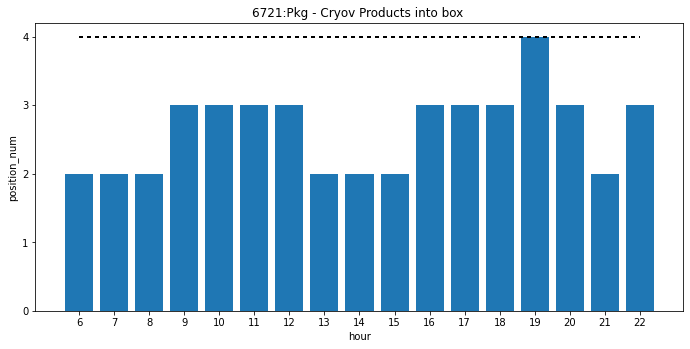

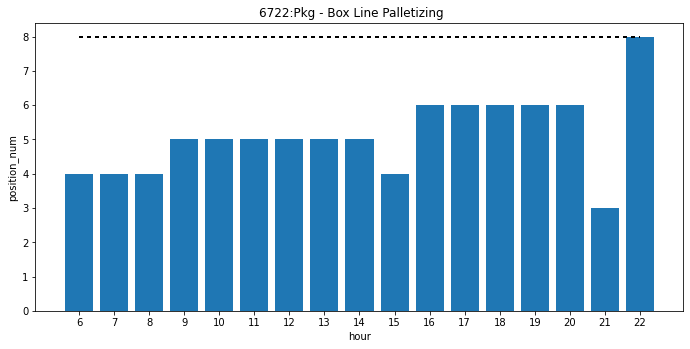

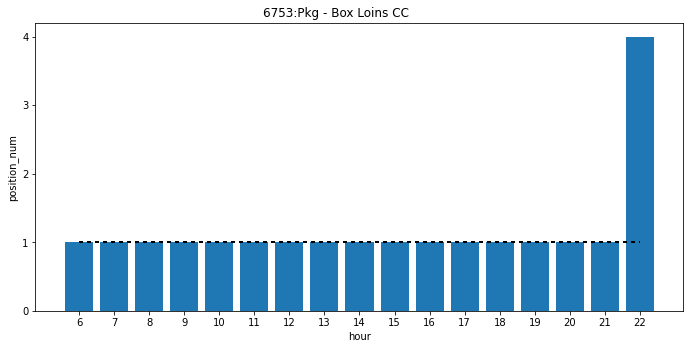

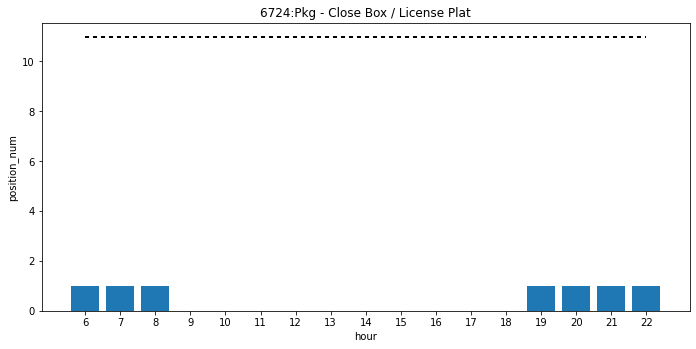

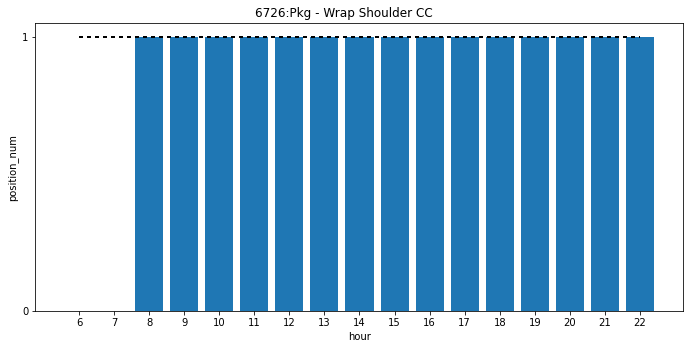

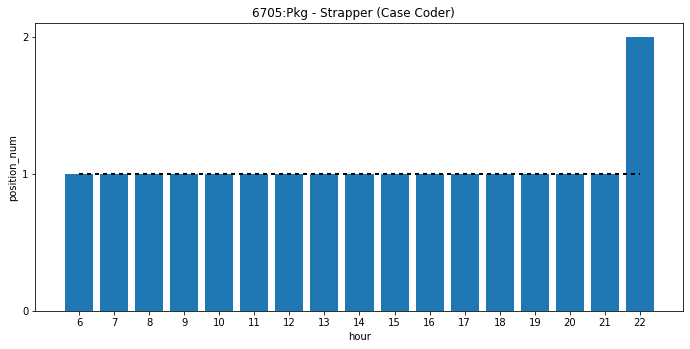

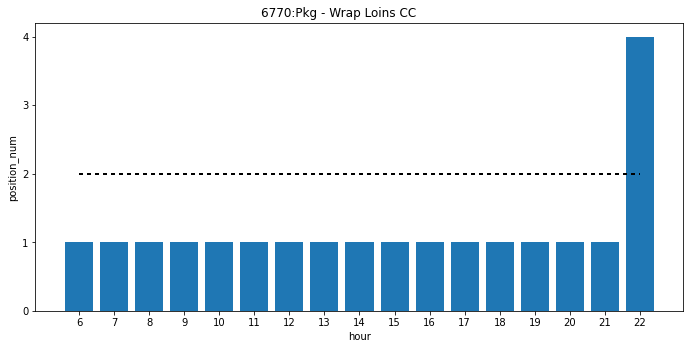

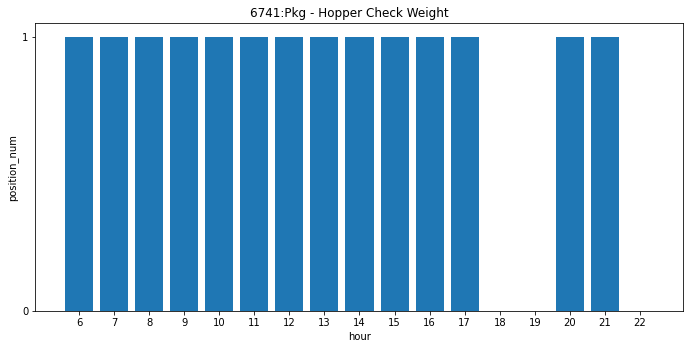

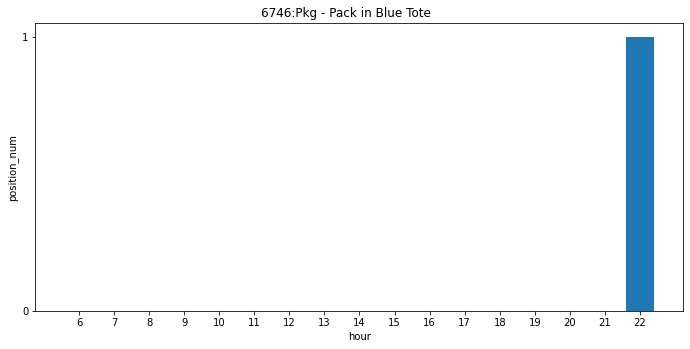

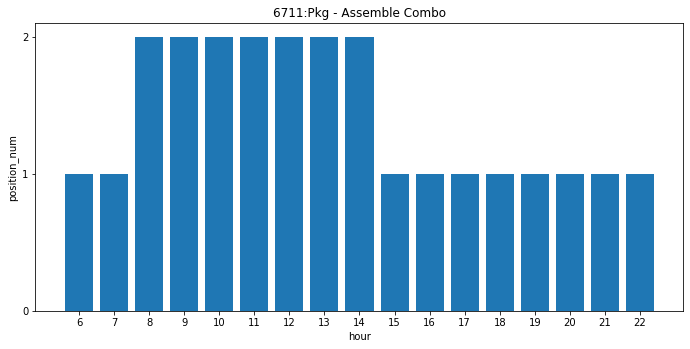

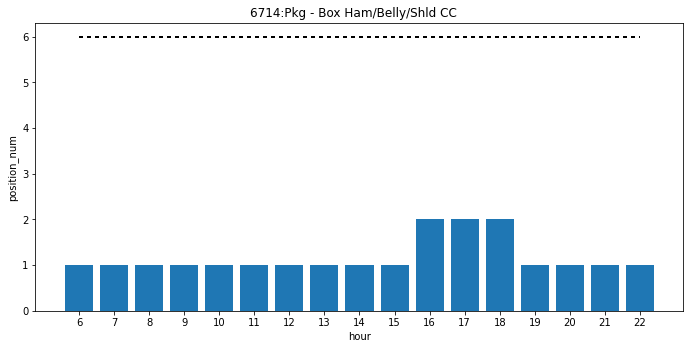

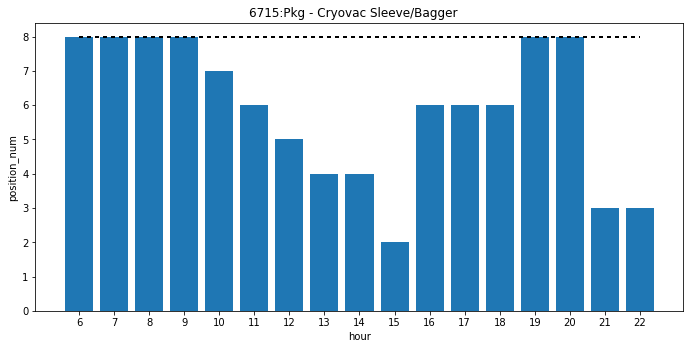

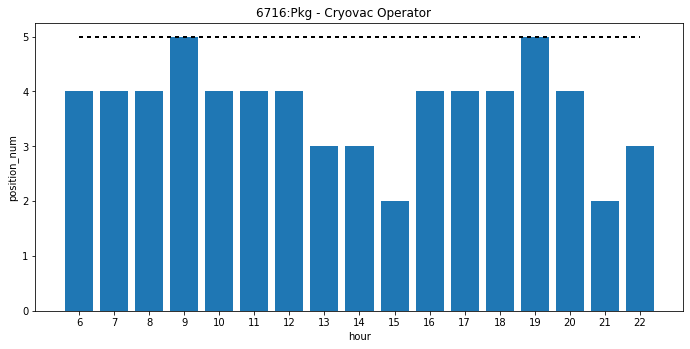

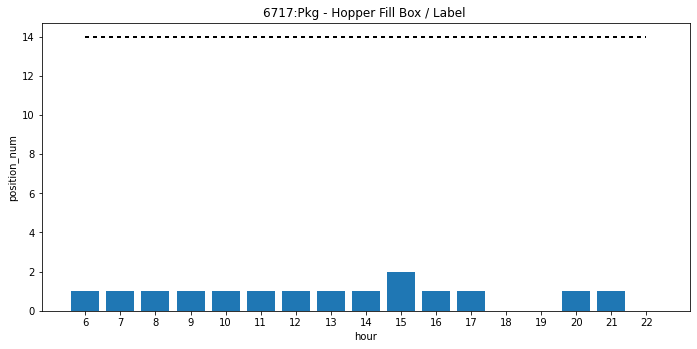

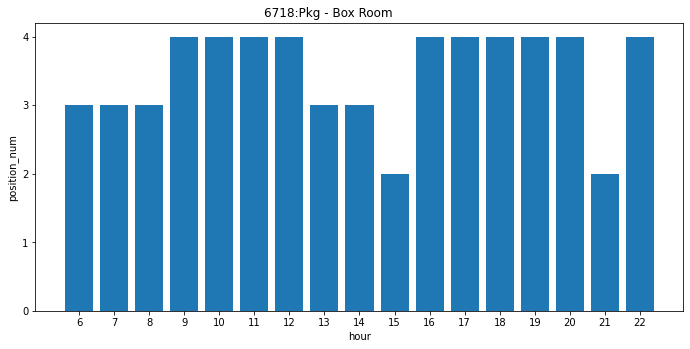

In [ ]:
visualize_estimated_position_num(best_plan,cap,hour_priority,seq)

In [ ]:
best_plan.to_excel("best_plan.xlsx")

# More Detailed Analysis


### To see how adjustment helps improve the overall efficiency.


##### Use Method 1 get an hourly plan

Method 1 calculate ratios based on pieces required by each sku.


In [ ]:
hourly_packaging_plan_method1, requirements_not_complete_method1 = plan_break_down(meat_and_req, meat_hourly, hour_priority)
hourly_packaging_plan_method1

,meatkey,itemkey,itemdesc,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,103,30024,Fresh Pork Belly Rindless 12 1/2 down,1,1,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0
1,103,30034,Fresh Pork Belly Rindless 12 1/2 up,3,3,4,4,3,4,3,4,3,4,4,3,6,5,6,6,4
2,104,11013,Fresh Pork Belly Rind On,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19
3,104,20014,Fresh Pork Belly Rind On,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,30
4,141,13213,Fresh Pork Belly Rind On Squared,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,760,30006,Fresh Pork Shoulder Butt Boneless Trimmed Bnls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
71,760,30706,Fresh Pork Shoulder Butt Boneless Trimmed Bnls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
72,762,25908,Pork Shld Picnic Bnls (CP),100,100,100,100,100,100,70,0,0,0,0,0,0,0,0,0,0
73,767,20055,SB - Fresh Pork Shoulder Blade,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,34


#### Adjust hourly plan with given learning rate


In [ ]:
new_plan,new_infeasible_table = adjust_infeasible_plan(hourly_packaging_plan_method1,req,cap,seq,hour_priority,adjusting_rate=0.01)

c:\Users\msmetanin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### Hourly Total Position Num Before Adjustment


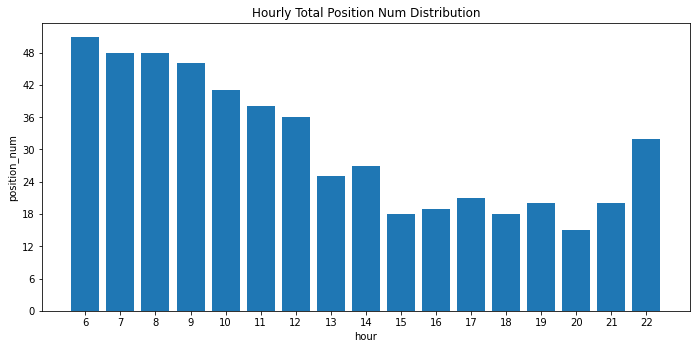

12.522626580338018

In [ ]:
hourly_total_position_stdev(hourly_packaging_plan_method1,cap,hour_priority,seq,plot=True)

#### Hourly Total Position Num after Adjustment


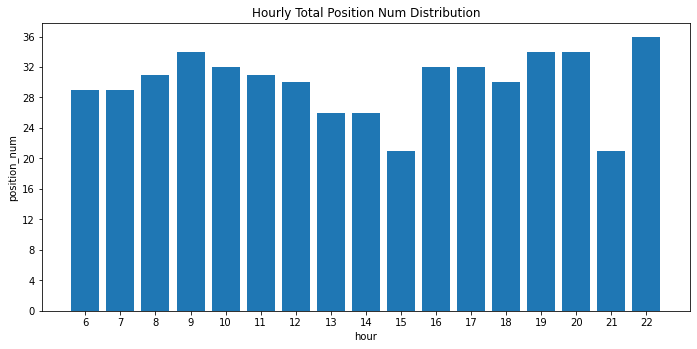

4.284891377578556

In [ ]:
hourly_total_position_stdev(new_plan,cap,hour_priority,seq,plot=True)